In [68]:
import pandas as pd
import numpy as np

In [69]:
transactions = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\project_data\project_transactions.csv",
                          dtype={"DAY": "Int16",
                                 "QUANTITY": "Int32",
                                 "STORE_ID": "Int32",
                                 "WEEK_NO": "Int8",}
                          )

In [70]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [71]:
# Reduced memory usage by ~35MB after converting to correct dtypes

transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      1048575 non-null  int64  
 1   BASKET_ID          1048575 non-null  int64  
 2   DAY                1048575 non-null  Int16  
 3   PRODUCT_ID         1048575 non-null  int64  
 4   QUANTITY           1048575 non-null  Int32  
 5   SALES_VALUE        1048575 non-null  float64
 6   STORE_ID           1048575 non-null  Int32  
 7   RETAIL_DISC        1048575 non-null  float64
 8   WEEK_NO            1048575 non-null  Int8   
 9   COUPON_DISC        1048575 non-null  float64
 10  COUPON_MATCH_DISC  1048575 non-null  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 71.0 MB


In [73]:
# Use to identify which values can be downcast

transactions.describe().round(2)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,1048575.00,1.048575e+06,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,1051.52,3.017059e+10,221.72,2459151.39,94.78,3.05,-1315.76,-0.53,32.36,-0.01,-0.00
std,604.44,1.547789e+09,97.42,3138076.05,1107.53,4.10,8329.83,1.22,13.92,0.20,0.04
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00,1.00,-129.98,1.00,-55.93,-7.70
25%,545.00,2.878861e+10,141.00,913785.00,1.00,1.26,330.00,-0.69,21.00,0.00,0.00
50%,1038.00,3.021561e+10,225.00,1020682.00,1.00,2.00,370.00,0.00,33.00,0.00,0.00
75%,1578.00,3.153172e+10,306.00,1122358.00,1.00,3.44,421.00,0.00,44.00,0.00,0.00
max,2099.00,3.270491e+10,385.00,13986853.00,61335.00,840.00,33923.00,3.99,56.00,0.00,0.00


In [74]:
# Check missing value counts

transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [75]:
# Calculate unique households in dataset with nunique (describe could also be used)

transactions["household_key"].nunique()

2097

In [76]:
# Calculate unique product_ids in dataset with nunique

transactions["PRODUCT_ID"].nunique()

61036

In [77]:
# create a discount sum column and a percentage discount column
transactions = (
    transactions
    .assign(total_discount = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"],
            percentage_discount = (lambda x: (x["total_discount"] / x["SALES_VALUE"]).abs()))
    .drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis=1))


# Use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions["percentage_discount"] = (transactions["percentage_discount"]
                                       .where(transactions["percentage_discount"] < 1, 1.0)
                                       .where(transactions["percentage_discount"] > 0, 0)
                                      )

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [78]:
# Statistic

In [79]:
# Total Sales Value

transactions['SALES_VALUE'].sum()

3199751.000000003

In [80]:
# Total Discount

transactions['total_discount'].sum()

-574858.3799999999

In [81]:
# Overall Percent Discount

transactions['total_discount'].sum() / transactions['SALES_VALUE'].sum()

-0.17965722332769

In [82]:
# Average of pct_discount column

transactions["percentage_discount"].mean()

0.21094692111583777

In [83]:
transactions['QUANTITY'].sum()

99379365

In [84]:

transactions["QUANTITY"].max()

61335

In [85]:
transactions.loc[transactions["QUANTITY"].argmax()]

household_key                  630.0
BASKET_ID              29484790880.0
DAY                            185.0
PRODUCT_ID                 6534178.0
QUANTITY                     61335.0
SALES_VALUE                   150.21
STORE_ID                       384.0
WEEK_NO                         27.0
total_discount                 -6.13
percentage_discount          0.04081
Name: 399061, dtype: Float64

In [86]:
# Sales value per transaction/basket

transactions['SALES_VALUE'].sum() / transactions['BASKET_ID'].nunique()

27.800955732221233

In [87]:
# Sales value per household

transactions['SALES_VALUE'].sum() / transactions['household_key'].nunique()

1525.870767763473

<AxesSubplot:ylabel='Frequency'>

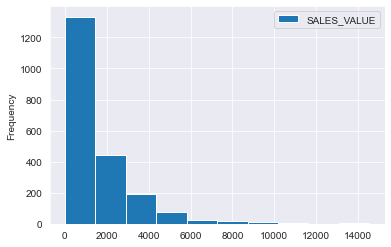

In [88]:
# plot distribution of households by total sales value
# First groupby household and calculate sum of sales
# then plot with a histogram

(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .plot.hist())

In [89]:
# store top 10 households by total value and quantity
# groupby household_key, calculate sum of relevant columns by household
# sort both by relevant metric in descending order, and grab top 10 rows

top10_value = (transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 .iloc[:10])

top10_quant = (transactions
 .groupby("household_key")
 .agg({"QUANTITY": "sum"})
 .sort_values("QUANTITY", ascending=False)
 .iloc[:10])

In [90]:
top10_value

,SALES_VALUE
household_key,
1023,14532.63
1609,13974.81
718,10590.99
982,10195.83
1453,9563.64
1229,9490.22
1111,9373.26
1430,9140.97
232,9129.97


In [91]:
top10_quant

,QUANTITY
household_key,
755,1946574
1023,1894569
1609,1039851
13,875778
1430,833633
982,810921
1852,790236
707,788013
1314,730363


In [92]:
# Use multiple aggregation to create both in a single table an option
# this here is just to use to compare to chart

(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum','QUANTITY': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 .loc[:, "SALES_VALUE"]
 .describe()
)

count     2097.000000
mean      1525.870768
std       1623.030614
min          2.000000
25%        423.260000
50%       1010.220000
75%       2018.400000
max      14532.630000
Name: SALES_VALUE, dtype: float64

<AxesSubplot:xlabel='household_key'>

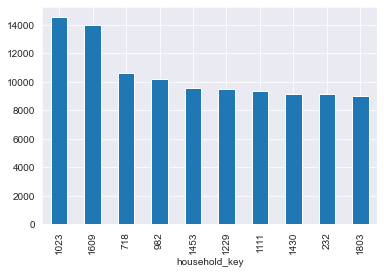

In [93]:
# top 10 households by sales value plotted with a bar plot

top10_value["SALES_VALUE"].plot.bar()

In [94]:
# Create top 10 products by sales df
# group by PRODUCT_ID and sum sales value by product
# Sort in descending order and grab top 10 rows

top10_products = (transactions
                 .groupby(["PRODUCT_ID"])
                 .agg({"SALES_VALUE": "sum"})
                 .sort_values("SALES_VALUE", ascending=False)
                 .iloc[:10]
)

<AxesSubplot:ylabel='PRODUCT_ID'>

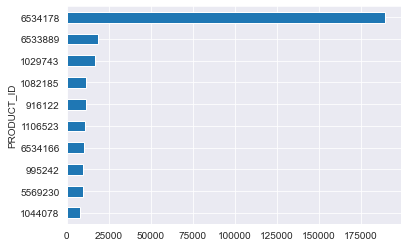

In [95]:
# plot top 10 products by sale value

top10_products["SALES_VALUE"].sort_values().plot.barh()

In [96]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products

((transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"total_discount"]
 .sum()) 
/(transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"SALES_VALUE"]
  .sum())
)

-0.11398659221628954

In [97]:
# read in products data

products = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\project_data\product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [98]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
# Then grab the top 10 products with iloc and extract the index to get product numbers

top_hh_products = (transactions
                   .query("household_key in @top10_value.index")
                   .loc[:, "PRODUCT_ID"]
                   .value_counts()
                   .iloc[:10]
                   .index
                  )

top_hh_products

Int64Index([6534178, 1082185, 1029743, 6533889, 1106523,  951590, 1127831,
             860776,  995242,  981760],
           dtype='int64')

In [99]:
# Filter product table to products from prior cell
products.query("PRODUCT_ID in @top_hh_products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [100]:
# Product with highest quantity in a single row

products.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [101]:
# Look up 10 product names for all customers (from first cell)

products.query("PRODUCT_ID in @top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
31296,1044078,2845,MEAT,National,BEEF,LEAN,
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
